<a href="https://colab.research.google.com/github/Kamruzzamansust/Fast_api_and_streamlit_combine/blob/main/lenet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive

In [112]:
train_directory = "/content/dataset/Emotions Dataset/Emotions Dataset/train"
validation_directory = "/content/dataset/Emotions Dataset/Emotions Dataset/test"
CLASS_NAMES = ['angry','happy','sad']






In [162]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE": 1e-3,
    "N_EPOCHS": 20,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 100,
    "N_DENSE_2": 10,
    "NUM_CLASSES": 3,
    #"PATCH_SIZE": 16,
    #"PROJ_DIM": 768,
    "CLASS_NAMES": ["angry", "happy", "sad"],
}

In [114]:
!pip install -q kaggle

In [115]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [116]:
!chmod 600 /root/.kaggle/kaggle.json

In [117]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

human-emotions-datasethes.zip: Skipping, found more recently modified local copy (use --force to force download)


In [118]:
!unzip "/content/human-emotions-datasethes.zip" -d "/content/dataset/"

Archive:  /content/human-emotions-datasethes.zip
replace /content/dataset/Emotions Dataset/Emotions Dataset/test/angry/101071.jpg_rotation_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [119]:
#Load the dataset

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION['BATCH_SIZE'],
    image_size=(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
    shuffle=True,
    seed=99,
    #validation_split = None,
    #subset = None ,
    #interpolation ='billinear',
    # follow_links = False,
    # crop_to_aspect_ratio = False,
    # **kwargs
)

Found 6799 files belonging to 3 classes.


In [120]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION['BATCH_SIZE'],
    image_size=(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
    shuffle=True,
    seed=99,
    #validation_split = None,
    #subset = None ,
    #interpolation ='billinear',
    # follow_links = False,
    # crop_to_aspect_ratio = False,
    # **kwargs
)

Found 2278 files belonging to 3 classes.


In [121]:
for i in val_dataset.take(1):
  print(i)




'''

The provided output appears to be a batch of data for a
computer vision task, likely image classification.
Let's break down the key components of this output:

Tensor Shape:

The first tensor in the output has a shape of (32, 256, 256, 3).
This indicates that it's a batch of 32 images, each of
size 256x256 pixels, and with 3 color channels (RGB).
Image Pixel Values:

The values in the tensor represent the pixel values of
the images in the batch. The pixel values are in the range
of 0 to 255 and are of type float32. These values seem to be
the normalized pixel values of the images, ranging from 0.0 to 255.0,
and have been converted to a range of 0.0 to 1.0 by dividing by 255.0.
Image Channels:

For each pixel, there are three values representing the Red, Green,
and Blue channels of the image. For example, the first pixel in the
first image has the RGB values [20.0, 20.0, 20.0].
Second Tensor:

The second tensor in the output has a shape of (32, 3). This tensor
appears to contain one-hot encoded labels for each image in the batch.
Each row represents the label for a corresponding image in the batch.
One-Hot Encoded Labels:

The one-hot encoding indicates the class of each image. For example,
the first row [0., 0., 1.] suggests that the corresponding image belongs to the
third class (assuming a zero-based index).
In summary, this output is a batch of 32 images, each represented by a
256x256x3 tensor of pixel values, along with their corresponding one-hot
encoded labels. This kind of format is typical for training
machine learning models, particularly in tasks like
image classification, where images are fed into a
neural network for training. The images are preprocessed, and
the labels are one-hot encoded for training purposes.


'''

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[ 20.        ,  20.        ,  20.        ],
         [ 19.1875    ,  19.1875    ,  19.1875    ],
         [ 19.        ,  19.        ,  19.        ],
         ...,
         [ 29.125     ,  29.125     ,  29.125     ],
         [ 25.        ,  25.        ,  25.        ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.        ,  20.        ,  20.        ],
         [ 19.847656  ,  19.847656  ,  19.847656  ],
         [ 19.8125    ,  19.8125    ,  19.8125    ],
         ...,
         [ 28.820312  ,  28.820312  ,  28.820312  ],
         [ 25.660156  ,  25.660156  ,  25.660156  ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.6875    ,  20.6875    ,  20.6875    ],
         [ 21.246094  ,  21.246094  ,  21.246094  ],
         [ 21.847656  ,  21.847656  ,  21.847656  ],
         ...,
         [ 25.3125    ,  25.3125    ,  25.3125    ],
         [ 22.375     ,  22.375     ,  22.375 

"\n\nThe provided output appears to be a batch of data for a\ncomputer vision task, likely image classification.\nLet's break down the key components of this output:\n\nTensor Shape:\n\nThe first tensor in the output has a shape of (32, 256, 256, 3).\nThis indicates that it's a batch of 32 images, each of\nsize 256x256 pixels, and with 3 color channels (RGB).\nImage Pixel Values:\n\nThe values in the tensor represent the pixel values of\nthe images in the batch. The pixel values are in the range\nof 0 to 255 and are of type float32. These values seem to be\nthe normalized pixel values of the images, ranging from 0.0 to 255.0,\nand have been converted to a range of 0.0 to 1.0 by dividing by 255.0.\nImage Channels:\n\nFor each pixel, there are three values representing the Red, Green,\nand Blue channels of the image. For example, the first pixel in the\nfirst image has the RGB values [20.0, 20.0, 20.0].\nSecond Tensor:\n\nThe second tensor in the output has a shape of (32, 3). This tenso

In [122]:
#Dataset Visualization



In [123]:
plt.figure(figsize = (12,12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

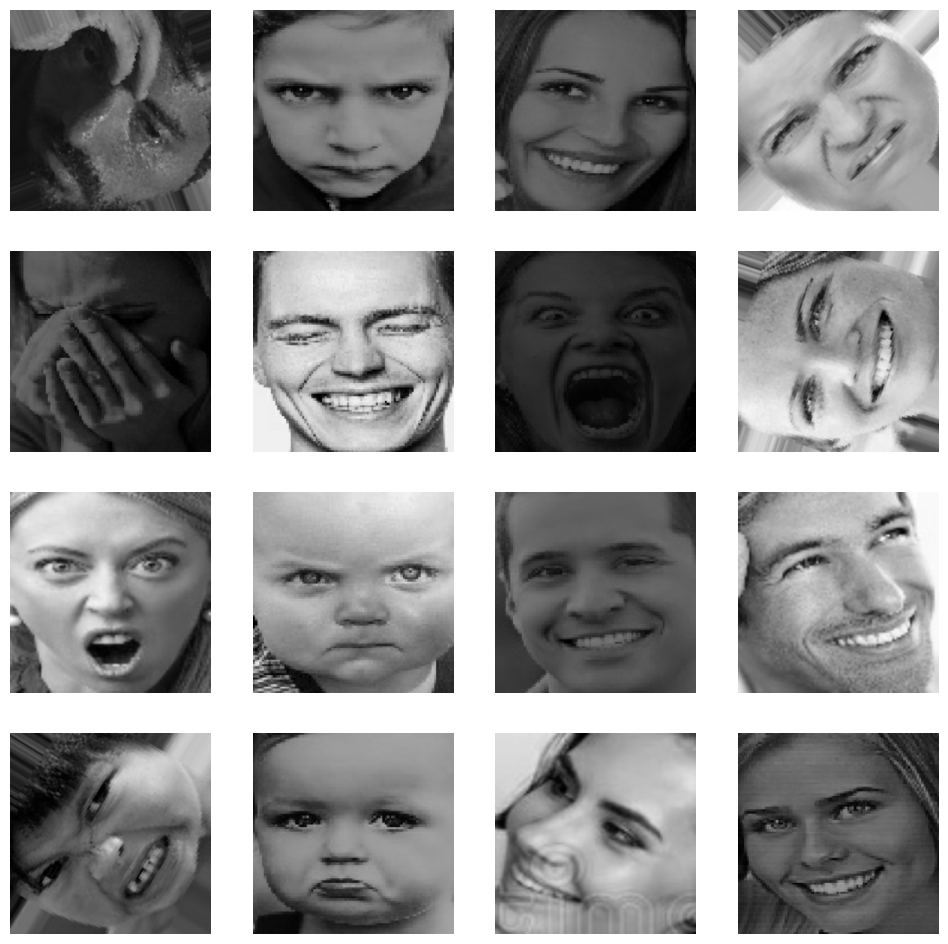

In [124]:
plt.figure(figsize = (12,12))

for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    #plt.title(CLASS_NAMES[tf.argmax(labels[i],  axis=1).numpy()])
    plt.axis("off")

In [125]:
training_dataset = (
    train_dataset.prefetch((tf.data.AUTOTUNE))

)
validation_dataset = (
    val_dataset.prefetch((tf.data.AUTOTUNE))

)

'''
prefetch:

The prefetch method is used to asynchronously fetch and buffer
elements from the dataset. This can improve the training
performance by overlapping the data loading and model training.
While the model is working on one batch, the input pipeline can
asynchronously prepare the next batch

'''


'''
tf.data.AUTOTUNE: This argument specifies
the number of elements to prefetch. Using AUTOTUNE
allows TensorFlow to dynamically adjust the prefetch
buffer size based on the available system resources and
the current workload. It's an adaptive strategy that can
optimize the data loading process.


'''

"\ntf.data.AUTOTUNE: This argument specifies\nthe number of elements to prefetch. Using AUTOTUNE\nallows TensorFlow to dynamically adjust the prefetch\nbuffer size based on the available system resources and\nthe current workload. It's an adaptive strategy that can\noptimize the data loading process.\n\n\n"

In [126]:
'''we will pass our data without recaling and resizing into the model

in model we will create layer for resize and rescale .

it is the best practice if our model go for deployment '''

'we will pass our data without recaling and resizing into the model\n\nin model we will create layer for resize and rescale .\n\nit is the best practice if our model go for deployment '

In [127]:
resize_rescale_layers = tf.keras.Sequential([
       Resizing(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
       Rescaling(1./255),
])

In [128]:
#MOdeling

In [145]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None ,None , 3), ),

    resize_rescale_layers,

    #Rescaling(1./255,name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 6)       168       
                                                                 
 batch_normalization_24 (Ba  (None, 254, 254, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 6)       0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 127, 127, 6)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 16)     

In [146]:
#Training

loss_function = CategoricalCrossentropy()

#loss_function = SparseCategoricalCrossentropy()

In [147]:

metrics = [CategoricalAccuracy(name = "accuracy"), TopKCategoricalAccuracy(k=2, name = "top_k_accuracy")]

In [148]:
lenet_model.compile(
    optimizer = Adam(learning_rate= CONFIGURATION['LEARNING_RATE']),
    loss = loss_function,
    metrics = metrics
)

In [149]:
history = lenet_model.fit(
  training_dataset,
  validation_data = validation_dataset,
  epochs = 2 ,#CONFIGURATION["N_EPOCHS"],
  verbose = 1,
  #class_weight = class_weights,
  #callbacks = [WandbCallback(), LogConfMatrix(), LogResultsTable()]
)

Epoch 1/2
213/213 [==============================] - 385s 2s/step - loss: 0.9135 - accuracy: 0.5848 - top_k_accuracy: 0.8356 - val_loss: 1.0660 - val_accuracy: 0.4561 - val_top_k_accuracy: 0.7744
Epoch 2/2
213/213 [==============================] - 379s 2s/step - loss: 0.6165 - accuracy: 0.7482 - top_k_accuracy: 0.9263 - val_loss: 0.8958 - val_accuracy: 0.5944 - val_top_k_accuracy: 0.8406


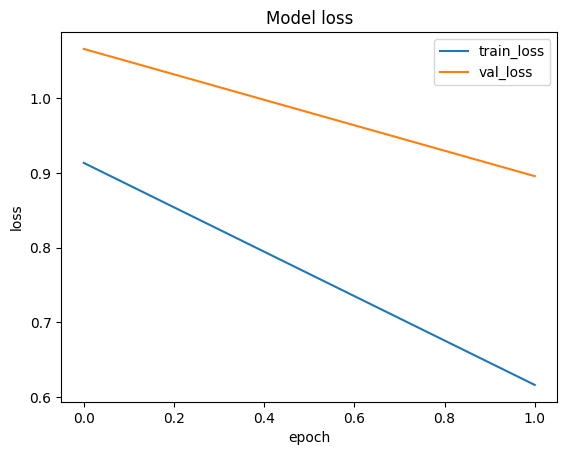

In [150]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

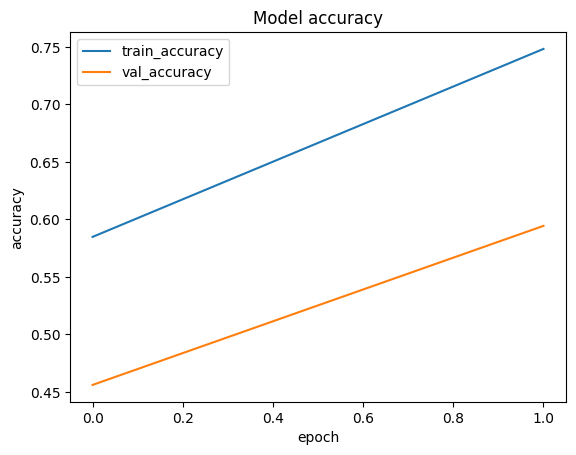

In [151]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [136]:
#Evaluation

In [172]:
lenet_model.evaluate(validation_dataset)

72/72 [==============================] - 37s 511ms/step - loss: 0.8958 - accuracy: 0.5944 - top_k_accuracy: 0.8406


[0.8957892060279846, 0.5943810343742371, 0.8406496644020081]

In [138]:
#Testing

In [160]:
test_image = cv2.imread("/content/dataset/Emotions Dataset/Emotions Dataset/test/happy/115103.jpg_rotation_1.jpg")

im = tf.constant(test_image, dtype = tf.float32)


im = tf.expand_dims(im,axis = 0 )
print(CLASS_NAMES[tf.argmax(lenet_model(im),axis = -1).numpy()[0]])
'''
The tf.expand_dims function is used to add an extra
dimension to the tensor im. In this case, axis=0 indicates
that the extra dimension is added at the beginning of the
tensor. This is done to simulate a batch of images, as many
machine learning models, especially those in TensorFlow,
expect input data to be organized in batches. The resulting
tensor has shape (1, height, width, channels), where height,
width, and channels correspond
to the dimensions of the image.

'''

happy


'\nThe tf.expand_dims function is used to add an extra\ndimension to the tensor im. In this case, axis=0 indicates\nthat the extra dimension is added at the beginning of the\ntensor. This is done to simulate a batch of images, as many\nmachine learning models, especially those in TensorFlow,\nexpect input data to be organized in batches. The resulting\ntensor has shape (1, height, width, channels), where height,\nwidth, and channels correspond\nto the dimensions of the image.\n\n'

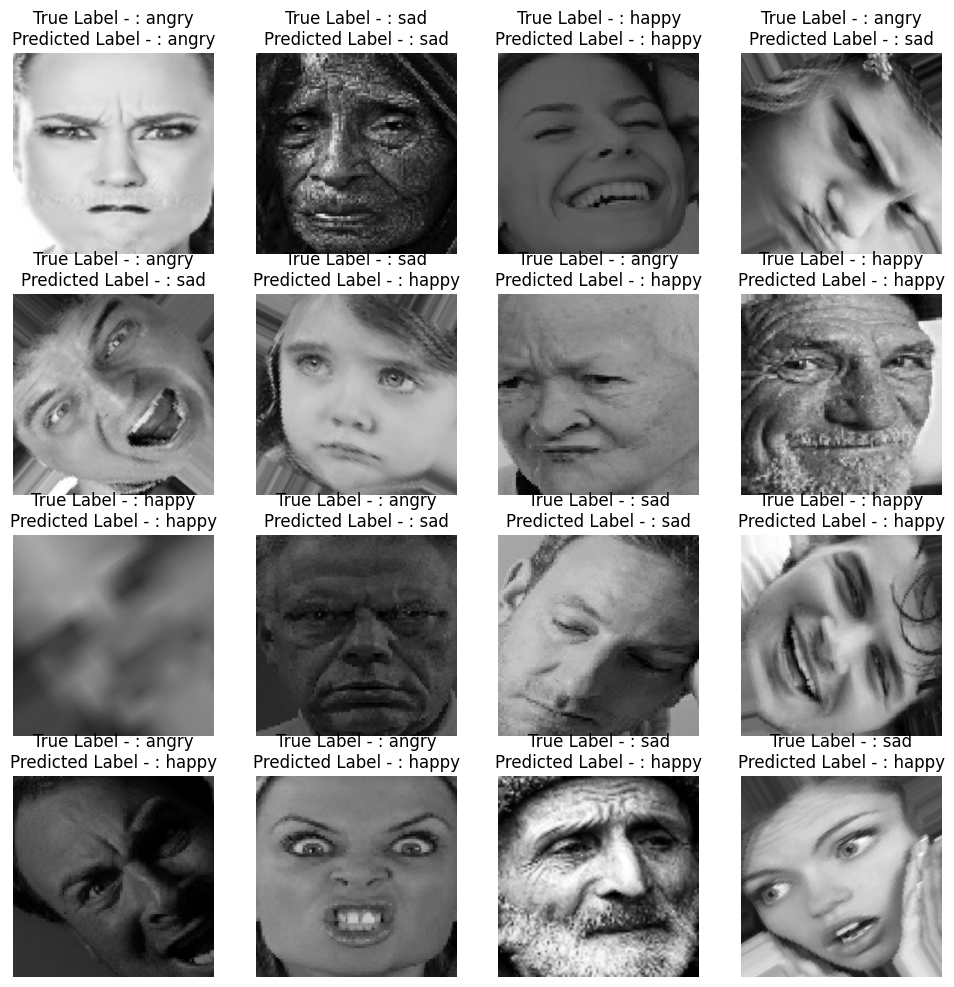

In [163]:
plt.figure(figsize = (12,12))

for images, labels in validation_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)

    plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis = -1).numpy()]
              + "\n" + "Predicted Label - : "
              + CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])] )
    plt.axis("off")

In [ ]:
#confusion Matrix

In [165]:
predicted = []
labels = []

for im, label in validation_dataset:
  predicted.append(lenet_model(im))
  labels.append(label.numpy())

In [168]:
print(np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))

[2 2 1 ... 2 0 1]
[2 2 1 ... 2 1 1]


In [170]:
pred = np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])
lab = np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()])

[[ 63 160 292]
 [  3 819 184]
 [  2 283 472]]


Text(0.5, 58.7222222222222, 'Predicted')

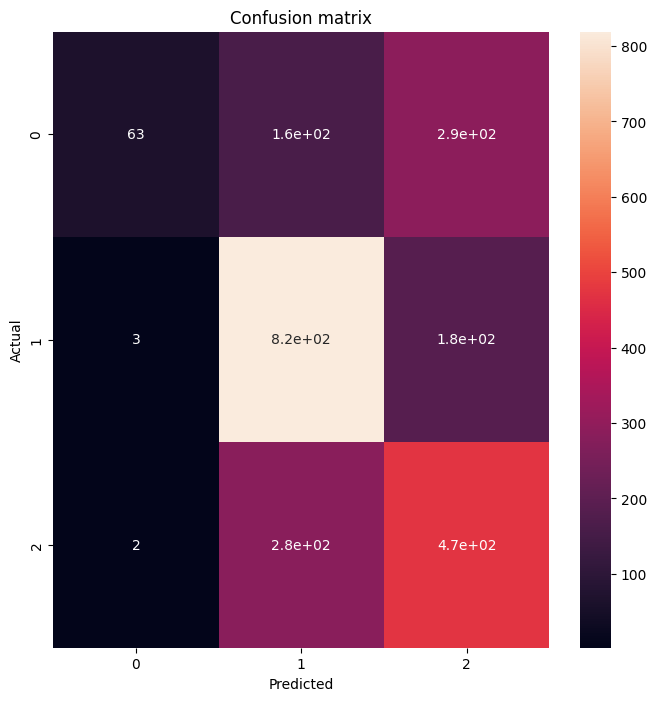

In [171]:
cm = confusion_matrix(lab, pred)
print(cm)
plt.figure(figsize=(8,8))

sns.heatmap(cm, annot=True,)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')